In [371]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from torch.autograd import Variable


dtype=torch.FloatTensor

In [364]:
x=torch.linspace(0,1,20)
y=torch.sin(x*6.28)+0.5*torch.randn(20)

#print(x,y)



In [372]:
# normalize the data 
x_norm = (x - x.mean())/x.std()
y_norm = (y - y.mean())/y.std()
#print(x_norm,y_norm)

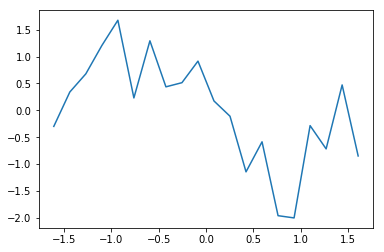

In [373]:

plt.plot(x_norm.numpy(),y_norm.numpy())
plt.show()

In [374]:
# Given equation , build feature matrix
#yi = a0 + a1xi + a2xi2 + a3 x3
features=torch.randn(20,4)
features[:,0] = 1
features[:,1] = x_norm
features[:,2] = x_norm**2
features[:,3] = x_norm**3

alpha=1e-6
features


 1.0000 -1.6058  2.5786 -4.1407
 1.0000 -1.4368  2.0643 -2.9659
 1.0000 -1.2677  1.6071 -2.0374
 1.0000 -1.0987  1.2071 -1.3263
 1.0000 -0.9297  0.8643 -0.8035
 1.0000 -0.7606  0.5786 -0.4401
 1.0000 -0.5916  0.3500 -0.2071
 1.0000 -0.4226  0.1786 -0.0755
 1.0000 -0.2535  0.0643 -0.0163
 1.0000 -0.0845  0.0071 -0.0006
 1.0000  0.0845  0.0071  0.0006
 1.0000  0.2535  0.0643  0.0163
 1.0000  0.4226  0.1786  0.0755
 1.0000  0.5916  0.3500  0.2071
 1.0000  0.7606  0.5786  0.4401
 1.0000  0.9297  0.8643  0.8035
 1.0000  1.0987  1.2071  1.3263
 1.0000  1.2677  1.6071  2.0374
 1.0000  1.4368  2.0643  2.9659
 1.0000  1.6058  2.5786  4.1407
[torch.FloatTensor of size 20x4]

In [375]:
features_var=Variable(features,requires_grad=False)
y_var=Variable(y_norm,requires_grad=False)



In [376]:
wts=pd.DataFrame([1,1,1,1]).as_matrix()
weights=Variable(torch.from_numpy(wts).type(dtype),requires_grad=True)


In [377]:
lossarray=[]
for epoch in range(10000):
    #print(w)
    y_pred=features_var.mm(weights)
    loss=(y_pred - y_var).pow(2).sum()
    #print(y_pred, Farm_y_tensor,(y_pred - Farm_y_tensor),l)
    loss.backward()
    #print("\tgrad:",w.grad.data[0])
    if(epoch==2000):
        final_weights=weights
        y_predictions=y_pred
    weights.data-=(alpha*weights.grad.data)
    weights.grad.data.zero_()
    lossarray.append(loss.data[0])
    print("progress:",epoch,loss.data[0])

progress: 0 5172.4765625
progress: 1 5146.310546875
progress: 2 5120.296875
progress: 3 5094.4345703125
progress: 4 5068.72265625
progress: 5 5043.1611328125
progress: 6 5017.74755859375
progress: 7 4992.482421875
progress: 8 4967.3642578125
progress: 9 4942.39208984375
progress: 10 4917.5654296875
progress: 11 4892.8828125
progress: 12 4868.34326171875
progress: 13 4843.94677734375
progress: 14 4819.69140625
progress: 15 4795.57763671875
progress: 16 4771.603515625
progress: 17 4747.7685546875
progress: 18 4724.07177734375
progress: 19 4700.5126953125
progress: 20 4677.08984375
progress: 21 4653.8037109375
progress: 22 4630.6513671875
progress: 23 4607.6337890625
progress: 24 4584.74951171875
progress: 25 4561.998046875
progress: 26 4539.37744140625
progress: 27 4516.888671875
progress: 28 4494.529296875
progress: 29 4472.2998046875
progress: 30 4450.19873046875
progress: 31 4428.22509765625
progress: 32 4406.37890625
progress: 33 4384.65869140625
progress: 34 4363.06396484375
progres

progress: 800 500.7467956542969
progress: 801 500.2969665527344
progress: 802 499.84906005859375
progress: 803 499.4031066894531
progress: 804 498.95904541015625
progress: 805 498.51690673828125
progress: 806 498.07666015625
progress: 807 497.6383056640625
progress: 808 497.20184326171875
progress: 809 496.7672424316406
progress: 810 496.33453369140625
progress: 811 495.9036865234375
progress: 812 495.47467041015625
progress: 813 495.0474853515625
progress: 814 494.6221618652344
progress: 815 494.1986389160156
progress: 816 493.7769470214844
progress: 817 493.3570861816406
progress: 818 492.9389953613281
progress: 819 492.5226745605469
progress: 820 492.108154296875
progress: 821 491.6954345703125
progress: 822 491.2844543457031
progress: 823 490.875244140625
progress: 824 490.4677429199219
progress: 825 490.06201171875
progress: 826 489.65802001953125
progress: 827 489.2557373046875
progress: 828 488.8551940917969
progress: 829 488.4563293457031
progress: 830 488.0592041015625
progres

progress: 1392 400.7096862792969
progress: 1393 400.6661071777344
progress: 1394 400.6227111816406
progress: 1395 400.5794677734375
progress: 1396 400.5363464355469
progress: 1397 400.493408203125
progress: 1398 400.45062255859375
progress: 1399 400.4079895019531
progress: 1400 400.3655090332031
progress: 1401 400.32318115234375
progress: 1402 400.281005859375
progress: 1403 400.2389831542969
progress: 1404 400.1971130371094
progress: 1405 400.1553955078125
progress: 1406 400.11383056640625
progress: 1407 400.0724182128906
progress: 1408 400.0311279296875
progress: 1409 399.9900207519531
progress: 1410 399.94903564453125
progress: 1411 399.908203125
progress: 1412 399.8675231933594
progress: 1413 399.82696533203125
progress: 1414 399.7865905761719
progress: 1415 399.746337890625
progress: 1416 399.70623779296875
progress: 1417 399.6662902832031
progress: 1418 399.62646484375
progress: 1419 399.5867919921875
progress: 1420 399.5472412109375
progress: 1421 399.50787353515625
progress: 14

progress: 1911 390.1215515136719
progress: 1912 390.1134338378906
progress: 1913 390.1053466796875
progress: 1914 390.0972900390625
progress: 1915 390.0892639160156
progress: 1916 390.08123779296875
progress: 1917 390.0732727050781
progress: 1918 390.0652770996094
progress: 1919 390.0573425292969
progress: 1920 390.0494079589844
progress: 1921 390.04150390625
progress: 1922 390.03363037109375
progress: 1923 390.0257568359375
progress: 1924 390.0179138183594
progress: 1925 390.0101013183594
progress: 1926 390.0023193359375
progress: 1927 389.9945373535156
progress: 1928 389.98675537109375
progress: 1929 389.9790344238281
progress: 1930 389.9713134765625
progress: 1931 389.963623046875
progress: 1932 389.9559631347656
progress: 1933 389.94830322265625
progress: 1934 389.940673828125
progress: 1935 389.93304443359375
progress: 1936 389.92547607421875
progress: 1937 389.91790771484375
progress: 1938 389.91033935546875
progress: 1939 389.9028015136719
progress: 1940 389.8952941894531
progre

progress: 2459 387.59686279296875
progress: 2460 387.5941467285156
progress: 2461 387.5914306640625
progress: 2462 387.5887451171875
progress: 2463 387.5860290527344
progress: 2464 387.5833435058594
progress: 2465 387.5806579589844
progress: 2466 387.57794189453125
progress: 2467 387.57525634765625
progress: 2468 387.57257080078125
progress: 2469 387.5699157714844
progress: 2470 387.5672302246094
progress: 2471 387.5645446777344
progress: 2472 387.5618896484375
progress: 2473 387.5592041015625
progress: 2474 387.5565490722656
progress: 2475 387.55389404296875
progress: 2476 387.5512390136719
progress: 2477 387.548583984375
progress: 2478 387.5459289550781
progress: 2479 387.54327392578125
progress: 2480 387.5406494140625
progress: 2481 387.5379943847656
progress: 2482 387.5353698730469
progress: 2483 387.5327453613281
progress: 2484 387.53009033203125
progress: 2485 387.5274658203125
progress: 2486 387.52484130859375
progress: 2487 387.522216796875
progress: 2488 387.5196228027344
prog

progress: 3016 386.421142578125
progress: 3017 386.4194030761719
progress: 3018 386.41766357421875
progress: 3019 386.41595458984375
progress: 3020 386.4142150878906
progress: 3021 386.4124755859375
progress: 3022 386.4107666015625
progress: 3023 386.4090270996094
progress: 3024 386.4073181152344
progress: 3025 386.40557861328125
progress: 3026 386.40386962890625
progress: 3027 386.4021301269531
progress: 3028 386.4004211425781
progress: 3029 386.398681640625
progress: 3030 386.39697265625
progress: 3031 386.395263671875
progress: 3032 386.3935241699219
progress: 3033 386.3918151855469
progress: 3034 386.39007568359375
progress: 3035 386.38836669921875
progress: 3036 386.38665771484375
progress: 3037 386.38494873046875
progress: 3038 386.38323974609375
progress: 3039 386.38153076171875
progress: 3040 386.3797912597656
progress: 3041 386.3780822753906
progress: 3042 386.3763732910156
progress: 3043 386.3746643066406
progress: 3044 386.3729553222656
progress: 3045 386.3712463378906
progr

progress: 3553 385.5898742675781
progress: 3554 385.5884704589844
progress: 3555 385.5870666503906
progress: 3556 385.5856628417969
progress: 3557 385.58428955078125
progress: 3558 385.5828857421875
progress: 3559 385.58148193359375
progress: 3560 385.580078125
progress: 3561 385.5787048339844
progress: 3562 385.5773010253906
progress: 3563 385.5758972167969
progress: 3564 385.57452392578125
progress: 3565 385.5731201171875
progress: 3566 385.5717468261719
progress: 3567 385.5703430175781
progress: 3568 385.5689392089844
progress: 3569 385.56756591796875
progress: 3570 385.566162109375
progress: 3571 385.5647888183594
progress: 3572 385.5633850097656
progress: 3573 385.56201171875
progress: 3574 385.56060791015625
progress: 3575 385.5592346191406
progress: 3576 385.5578308105469
progress: 3577 385.55645751953125
progress: 3578 385.5550537109375
progress: 3579 385.5536804199219
progress: 3580 385.55230712890625
progress: 3581 385.5509033203125
progress: 3582 385.5495300292969
progress: 

progress: 4047 384.9513854980469
progress: 4048 384.9501953125
progress: 4049 384.9490051269531
progress: 4050 384.94781494140625
progress: 4051 384.94659423828125
progress: 4052 384.9454040527344
progress: 4053 384.9442138671875
progress: 4054 384.9430236816406
progress: 4055 384.94183349609375
progress: 4056 384.9406433105469
progress: 4057 384.939453125
progress: 4058 384.9382629394531
progress: 4059 384.93707275390625
progress: 4060 384.9358825683594
progress: 4061 384.9346923828125
progress: 4062 384.9335021972656
progress: 4063 384.9322814941406
progress: 4064 384.9311218261719
progress: 4065 384.929931640625
progress: 4066 384.9287414550781
progress: 4067 384.92755126953125
progress: 4068 384.9263610839844
progress: 4069 384.9251708984375
progress: 4070 384.9239807128906
progress: 4071 384.92279052734375
progress: 4072 384.9216003417969
progress: 4073 384.92041015625
progress: 4074 384.9192199707031
progress: 4075 384.91802978515625
progress: 4076 384.9168701171875
progress: 407

progress: 4533 384.40985107421875
progress: 4534 384.4088134765625
progress: 4535 384.40777587890625
progress: 4536 384.4067687988281
progress: 4537 384.40570068359375
progress: 4538 384.4046630859375
progress: 4539 384.40362548828125
progress: 4540 384.4026184082031
progress: 4541 384.4015808105469
progress: 4542 384.4005432128906
progress: 4543 384.3995056152344
progress: 4544 384.3984680175781
progress: 4545 384.3974304199219
progress: 4546 384.3963928222656
progress: 4547 384.3953552246094
progress: 4548 384.39434814453125
progress: 4549 384.393310546875
progress: 4550 384.39227294921875
progress: 4551 384.3912353515625
progress: 4552 384.39019775390625
progress: 4553 384.38916015625
progress: 4554 384.3881530761719
progress: 4555 384.3871154785156
progress: 4556 384.3860778808594
progress: 4557 384.3850402832031
progress: 4558 384.3840026855469
progress: 4559 384.38299560546875
progress: 4560 384.3819580078125
progress: 4561 384.38092041015625
progress: 4562 384.3799133300781
prog

progress: 4981 383.9732971191406
progress: 4982 383.9723815917969
progress: 4983 383.9714660644531
progress: 4984 383.9705505371094
progress: 4985 383.9696350097656
progress: 4986 383.9687194824219
progress: 4987 383.9678039550781
progress: 4988 383.9668884277344
progress: 4989 383.9659729003906
progress: 4990 383.9650573730469
progress: 4991 383.9641418457031
progress: 4992 383.9632568359375
progress: 4993 383.96234130859375
progress: 4994 383.96142578125
progress: 4995 383.96051025390625
progress: 4996 383.9595947265625
progress: 4997 383.95867919921875
progress: 4998 383.957763671875
progress: 4999 383.9568786621094
progress: 5000 383.9559631347656
progress: 5001 383.9550476074219
progress: 5002 383.9541320800781
progress: 5003 383.9532165527344
progress: 5004 383.95233154296875
progress: 5005 383.951416015625
progress: 5006 383.95050048828125
progress: 5007 383.9495849609375
progress: 5008 383.94866943359375
progress: 5009 383.9477844238281
progress: 5010 383.9468688964844
progress

progress: 5558 383.4848937988281
progress: 5559 383.484130859375
progress: 5560 383.48333740234375
progress: 5561 383.4825439453125
progress: 5562 383.4817810058594
progress: 5563 383.4809875488281
progress: 5564 383.4801940917969
progress: 5565 383.47943115234375
progress: 5566 383.4786376953125
progress: 5567 383.4778747558594
progress: 5568 383.4770812988281
progress: 5569 383.476318359375
progress: 5570 383.47552490234375
progress: 5571 383.4747619628906
progress: 5572 383.4739685058594
progress: 5573 383.4731750488281
progress: 5574 383.472412109375
progress: 5575 383.47161865234375
progress: 5576 383.4708557128906
progress: 5577 383.4700927734375
progress: 5578 383.46929931640625
progress: 5579 383.468505859375
progress: 5580 383.4677429199219
progress: 5581 383.46697998046875
progress: 5582 383.4661865234375
progress: 5583 383.46539306640625
progress: 5584 383.4646301269531
progress: 5585 383.4638671875
progress: 5586 383.46307373046875
progress: 5587 383.4623107910156
progress:

progress: 6025 383.1410827636719
progress: 6026 383.140380859375
progress: 6027 383.1396789550781
progress: 6028 383.1390075683594
progress: 6029 383.1383056640625
progress: 6030 383.13763427734375
progress: 6031 383.1369323730469
progress: 6032 383.13623046875
progress: 6033 383.13555908203125
progress: 6034 383.1348571777344
progress: 6035 383.1341552734375
progress: 6036 383.13348388671875
progress: 6037 383.1327819824219
progress: 6038 383.132080078125
progress: 6039 383.13140869140625
progress: 6040 383.1307067871094
progress: 6041 383.1300354003906
progress: 6042 383.12933349609375
progress: 6043 383.1286315917969
progress: 6044 383.1279602050781
progress: 6045 383.12725830078125
progress: 6046 383.1265869140625
progress: 6047 383.1258850097656
progress: 6048 383.1252136230469
progress: 6049 383.12451171875
progress: 6050 383.1238098144531
progress: 6051 383.1231384277344
progress: 6052 383.1224365234375
progress: 6053 383.12176513671875
progress: 6054 383.1210632324219
progress:

progress: 6569 382.7893981933594
progress: 6570 382.7887878417969
progress: 6571 382.7881774902344
progress: 6572 382.7875671386719
progress: 6573 382.7869873046875
progress: 6574 382.786376953125
progress: 6575 382.7857666015625
progress: 6576 382.78515625
progress: 6577 382.7845764160156
progress: 6578 382.7839660644531
progress: 6579 382.7833557128906
progress: 6580 382.7827453613281
progress: 6581 382.78216552734375
progress: 6582 382.78155517578125
progress: 6583 382.78094482421875
progress: 6584 382.7803649902344
progress: 6585 382.7797546386719
progress: 6586 382.7791442871094
progress: 6587 382.778564453125
progress: 6588 382.7779541015625
progress: 6589 382.77734375
progress: 6590 382.7767639160156
progress: 6591 382.7761535644531
progress: 6592 382.7755432128906
progress: 6593 382.77496337890625
progress: 6594 382.77435302734375
progress: 6595 382.77374267578125
progress: 6596 382.7731628417969
progress: 6597 382.7725524902344
progress: 6598 382.7719421386719
progress: 6599 3

progress: 7102 382.4881591796875
progress: 7103 382.4876403808594
progress: 7104 382.48712158203125
progress: 7105 382.486572265625
progress: 7106 382.4860534667969
progress: 7107 382.48553466796875
progress: 7108 382.4849853515625
progress: 7109 382.4844665527344
progress: 7110 382.48394775390625
progress: 7111 382.4833984375
progress: 7112 382.4828796386719
progress: 7113 382.48236083984375
progress: 7114 382.4818115234375
progress: 7115 382.4812927246094
progress: 7116 382.48077392578125
progress: 7117 382.4802551269531
progress: 7118 382.4797058105469
progress: 7119 382.47918701171875
progress: 7120 382.4786682128906
progress: 7121 382.4781494140625
progress: 7122 382.47760009765625
progress: 7123 382.4770812988281
progress: 7124 382.4765625
progress: 7125 382.4760437011719
progress: 7126 382.4754943847656
progress: 7127 382.4749755859375
progress: 7128 382.4744567871094
progress: 7129 382.47393798828125
progress: 7130 382.4734191894531
progress: 7131 382.4728698730469
progress: 71

progress: 7714 382.1869812011719
progress: 7715 382.1865234375
progress: 7716 382.1860656738281
progress: 7717 382.18560791015625
progress: 7718 382.1851501464844
progress: 7719 382.1846923828125
progress: 7720 382.1842346191406
progress: 7721 382.18377685546875
progress: 7722 382.1833190917969
progress: 7723 382.182861328125
progress: 7724 382.1824035644531
progress: 7725 382.18194580078125
progress: 7726 382.1814880371094
progress: 7727 382.1810302734375
progress: 7728 382.18060302734375
progress: 7729 382.1801452636719
progress: 7730 382.1796875
progress: 7731 382.1792297363281
progress: 7732 382.17877197265625
progress: 7733 382.1783142089844
progress: 7734 382.1778564453125
progress: 7735 382.1773986816406
progress: 7736 382.17694091796875
progress: 7737 382.1764831542969
progress: 7738 382.176025390625
progress: 7739 382.1755676269531
progress: 7740 382.1751403808594
progress: 7741 382.1746826171875
progress: 7742 382.1742248535156
progress: 7743 382.17376708984375
progress: 7744

progress: 8235 381.96258544921875
progress: 8236 381.9621887207031
progress: 8237 381.9617919921875
progress: 8238 381.9613952636719
progress: 8239 381.9609680175781
progress: 8240 381.9605712890625
progress: 8241 381.9601745605469
progress: 8242 381.95977783203125
progress: 8243 381.9593505859375
progress: 8244 381.9589538574219
progress: 8245 381.95855712890625
progress: 8246 381.9581604003906
progress: 8247 381.9577331542969
progress: 8248 381.95733642578125
progress: 8249 381.9569396972656
progress: 8250 381.95654296875
progress: 8251 381.95611572265625
progress: 8252 381.9557189941406
progress: 8253 381.955322265625
progress: 8254 381.9549255371094
progress: 8255 381.9544982910156
progress: 8256 381.9541015625
progress: 8257 381.9537048339844
progress: 8258 381.95330810546875
progress: 8259 381.9529113769531
progress: 8260 381.9524841308594
progress: 8261 381.95208740234375
progress: 8262 381.9516906738281
progress: 8263 381.9512939453125
progress: 8264 381.9508972167969
progress:

progress: 8775 381.7566223144531
progress: 8776 381.7562561035156
progress: 8777 381.75592041015625
progress: 8778 381.75555419921875
progress: 8779 381.75518798828125
progress: 8780 381.75482177734375
progress: 8781 381.7544860839844
progress: 8782 381.7541198730469
progress: 8783 381.7537536621094
progress: 8784 381.75341796875
progress: 8785 381.7530517578125
progress: 8786 381.752685546875
progress: 8787 381.7523193359375
progress: 8788 381.7519836425781
progress: 8789 381.7516174316406
progress: 8790 381.7512512207031
progress: 8791 381.7508850097656
progress: 8792 381.75054931640625
progress: 8793 381.75018310546875
progress: 8794 381.74981689453125
progress: 8795 381.7494812011719
progress: 8796 381.7491149902344
progress: 8797 381.7487487792969
progress: 8798 381.7484130859375
progress: 8799 381.748046875
progress: 8800 381.7476806640625
progress: 8801 381.747314453125
progress: 8802 381.7469787597656
progress: 8803 381.7466125488281
progress: 8804 381.7462463378906
progress: 8

progress: 9393 381.5494689941406
progress: 9394 381.5491638183594
progress: 9395 381.5488586425781
progress: 9396 381.5485534667969
progress: 9397 381.5482482910156
progress: 9398 381.54791259765625
progress: 9399 381.547607421875
progress: 9400 381.54730224609375
progress: 9401 381.5469970703125
progress: 9402 381.5466613769531
progress: 9403 381.5463562011719
progress: 9404 381.5460510253906
progress: 9405 381.5457458496094
progress: 9406 381.5454406738281
progress: 9407 381.54510498046875
progress: 9408 381.5447998046875
progress: 9409 381.54449462890625
progress: 9410 381.544189453125
progress: 9411 381.5438537597656
progress: 9412 381.5435485839844
progress: 9413 381.5432434082031
progress: 9414 381.5429382324219
progress: 9415 381.5426330566406
progress: 9416 381.54229736328125
progress: 9417 381.5419921875
progress: 9418 381.54168701171875
progress: 9419 381.5413818359375
progress: 9420 381.54107666015625
progress: 9421 381.5407409667969
progress: 9422 381.5404357910156
progress

progress: 9996 381.3726501464844
progress: 9997 381.37237548828125
progress: 9998 381.3721008300781
progress: 9999 381.371826171875


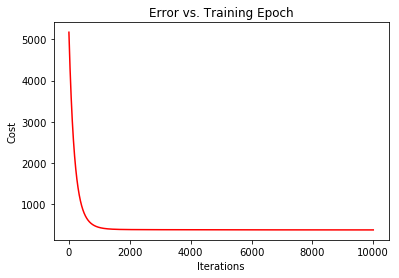

In [378]:
fig, ax = plt.subplots()  
ax.plot(np.arange(10000),lossarray, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  
plt.show()

In [379]:
# Model converged at 2000 iterations
# weights can be considered as 
loss


Variable containing:
 381.3718
[torch.FloatTensor of size 1]

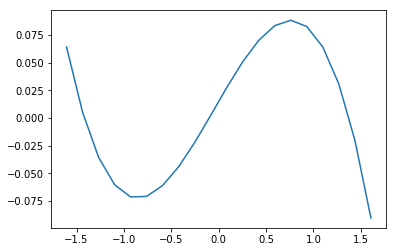

In [380]:
plt.plot(x_norm.numpy(),y_pred.data.numpy())
plt.show()
